In [1]:
import json
import pathlib
from pprint import pprint

import matplotlib.pyplot as plt
import polars as pl

import srcdir

BBOX_IMAGE_DIR = pathlib.Path('../data/train_bbox_images')
BBOX_ANNOTATIONS = pathlib.Path('../data/train_bbox_annotations.json')

/home/tomo/workspace/src is added into sys.path


In [ ]:
with open(BBOX_ANNOTATIONS, 'r') as f:
    annotations = json.load(f)['images']
    
bboxes = []
for annotation in annotations:
    _anno = {
        'image_id': int(annotation['file_name'].split('.')[0].split('_')[-1]),
        'file_name': annotation['file_name'],
        'image_width': annotation['width'],
        'image_height': annotation['height'],
    }
    for i, bbox in enumerate(annotation['annotations']):
        _bbox = {
            'bbox_id': i,
            'class': bbox['class'],
            'x_min': bbox['bbox'][0],
            'y_min': bbox['bbox'][1],
            'bbox_width': bbox['bbox'][2],
            'bbox_height': bbox['bbox'][3],
            'bbox_area': bbox['bbox'][2] * bbox['bbox'][3],
        }
        bboxes.append(_anno | _bbox)

bbox_df = pl.DataFrame(bboxes).sort(by=('image_id', 'bbox_id'))
bbox_df

shape: (2_653, 11)
┌──────────┬────────────┬────────────┬───────────┬───┬─────────┬───────────┬───────────┬───────────┐
│ image_id ┆ file_name  ┆ image_widt ┆ image_hei ┆ … ┆ y_min   ┆ bbox_widt ┆ bbox_heig ┆ bbox_area │
│ ---      ┆ ---        ┆ h          ┆ ght       ┆   ┆ ---     ┆ h         ┆ ht        ┆ ---       │
│ i64      ┆ str        ┆ ---        ┆ ---       ┆   ┆ f64     ┆ ---       ┆ ---       ┆ f64       │
│          ┆            ┆ i64        ┆ i64       ┆   ┆         ┆ f64       ┆ f64       ┆           │
╞══════════╪════════════╪════════════╪═══════════╪═══╪═════════╪═══════════╪═══════════╪═══════════╡
│ 0        ┆ train_0.ti ┆ 500        ┆ 375       ┆ … ┆ 36.246  ┆ 35.0      ┆ 45.146    ┆ 1580.11   │
│          ┆ f          ┆            ┆           ┆   ┆         ┆           ┆           ┆           │
│ 0        ┆ train_0.ti ┆ 500        ┆ 375       ┆ … ┆ 156.0   ┆ 203.0     ┆ 144.0     ┆ 29232.0   │
│          ┆ f          ┆            ┆           ┆   ┆         ┆           ┆           ┆           │
│ 1        ┆ train_1.ti ┆ 500        ┆ 375       ┆ … ┆ 231.0   ┆ 56.0      ┆ 34.0      ┆ 1904.0    │
│          ┆ f          ┆            ┆           ┆   ┆         ┆           ┆           ┆           │
│ 2        ┆ train_2.ti ┆ 500        ┆ 375       ┆ … ┆ 168.404 ┆ 47.705    ┆ 45.298    ┆ 2160.9410 │
│          ┆ f          ┆            ┆           ┆   ┆         ┆           ┆           ┆ 9         │
│ 3        ┆ train_3.ti ┆ 500        ┆ 375       ┆ … ┆ 196.0   ┆ 33.0      ┆ 57.0      ┆ 1881.0    │
│          ┆ f          ┆            ┆           ┆   ┆         ┆           ┆           ┆           │
│ …        ┆ …          ┆ …          ┆ …         ┆ … ┆ …       ┆ …         ┆ …         ┆ …         │
│ 598      ┆ train_598. ┆ 500        ┆ 375       ┆ … ┆ 162.0   ┆ 27.0      ┆ 28.0      ┆ 756.0     │
│          ┆ tif        ┆            ┆           ┆   ┆         ┆           ┆           ┆           │
│ 599      ┆ train_599. ┆ 500        ┆ 375       ┆ … ┆ 259.731 ┆ 53.675    ┆ 67.836    ┆ 3641.0973 │
│          ┆ tif        ┆            ┆           ┆   ┆         ┆           ┆           ┆           │
│ 599      ┆ train_599. ┆ 500        ┆ 375       ┆ … ┆ 136.0   ┆ 44.0      ┆ 44.0      ┆ 1936.0    │
│          ┆ tif        ┆            ┆           ┆   ┆         ┆           ┆           ┆           │
│ 599      ┆ train_599. ┆ 500        ┆ 375       ┆ … ┆ 185.0   ┆ 43.0      ┆ 45.0      ┆ 1935.0    │
│          ┆ tif        ┆            ┆           ┆   ┆         ┆           ┆           ┆           │
│ 599      ┆ train_599. ┆ 500        ┆ 375       ┆ … ┆ 215.0   ┆ 32.0      ┆ 45.0      ┆ 1440.0    │
│          ┆ tif        ┆            ┆           ┆   ┆         ┆           ┆           ┆           │
└──────────┴────────────┴────────────┴───────────┴───┴─────────┴───────────┴───────────┴───────────┘

In [88]:
print('Number of images:', len(annotations))
print('Number of bboxes:', len(bbox_df))

Number of images: 600
Number of bboxes: 2653


In [89]:
bbox_df.get_column('image_width').unique()

shape: (1,)
Series: 'image_width' [i64]
[
	500
]

In [91]:
bbox_df.get_column('image_height').unique()

shape: (1,)
Series: 'image_height' [i64]
[
	375
]

In [92]:
bbox_df.get_column('class').unique()

shape: (1,)
Series: 'class' [str]
[
	"vacant_lot"
]

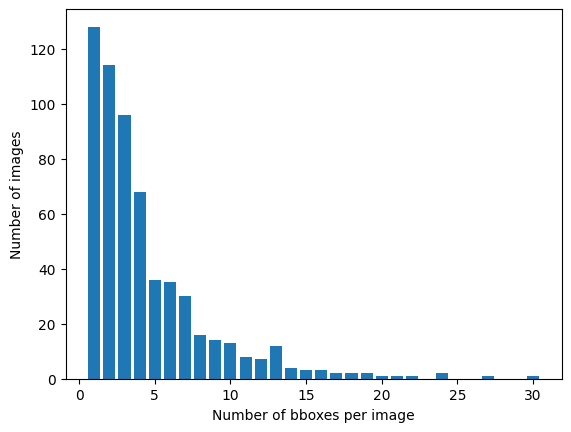

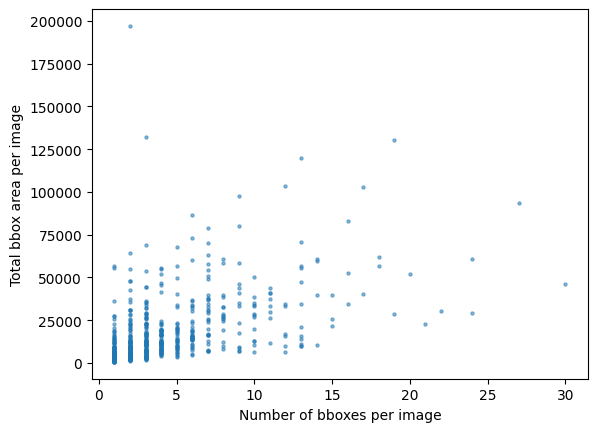

In [19]:
bbox_stats = bbox_df.group_by('image_id') \
                    .agg(bbox_count=pl.col('bbox_id').max() + 1, total_area=pl.col('bbox_area').sum()) \

bbox_count = bbox_stats.get_column('bbox_count') \
                       .value_counts() \
                       .sort(by='bbox_count')

plt.bar(
    bbox_count.get_column('bbox_count').to_numpy(),
    bbox_count.get_column('count').to_numpy(),
)
plt.xlabel('Number of bboxes per image')
plt.ylabel('Number of images')
plt.show()

plt.scatter(
    bbox_stats.get_column('bbox_count').to_numpy(),
    bbox_stats.get_column('total_area').to_numpy(),
    alpha=0.5,
    s=5
)
plt.xlabel('Number of bboxes per image')
plt.ylabel('Total bbox area per image')
plt.show()

In [94]:
bbox_df.get_column('bbox_width').describe(percentiles=None)

shape: (6, 2)
┌────────────┬───────────┐
│ statistic  ┆ value     │
│ ---        ┆ ---       │
│ str        ┆ f64       │
╞════════════╪═══════════╡
│ count      ┆ 2653.0    │
│ null_count ┆ 0.0       │
│ mean       ┆ 59.62923  │
│ std        ┆ 38.379945 │
│ min        ┆ 5.0       │
│ max        ┆ 469.0     │
└────────────┴───────────┘

In [95]:
bbox_df.get_column('bbox_height').describe(percentiles=None)

shape: (6, 2)
┌────────────┬───────────┐
│ statistic  ┆ value     │
│ ---        ┆ ---       │
│ str        ┆ f64       │
╞════════════╪═══════════╡
│ count      ┆ 2653.0    │
│ null_count ┆ 0.0       │
│ mean       ┆ 55.043907 │
│ std        ┆ 33.522681 │
│ min        ┆ 1.0       │
│ max        ┆ 375.0     │
└────────────┴───────────┘

In [96]:
bbox_df.get_column('bbox_area').describe(percentiles=None)

shape: (6, 2)
┌────────────┬─────────────┐
│ statistic  ┆ value       │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 2653.0      │
│ null_count ┆ 0.0         │
│ mean       ┆ 4116.176349 │
│ std        ┆ 6549.882811 │
│ min        ┆ 14.0        │
│ max        ┆ 175406.0    │
└────────────┴─────────────┘

In [98]:
bbox_df.filter(
    (pl.col('bbox_height') == bbox_df.get_column('bbox_height').min())
    | (pl.col('bbox_height') == bbox_df.get_column('bbox_height').max())
    | (pl.col('bbox_width') == bbox_df.get_column('bbox_width').min())
    | (pl.col('bbox_width') == bbox_df.get_column('bbox_width').max())
    | (pl.col('bbox_area') == bbox_df.get_column('bbox_area').min())
    | (pl.col('bbox_area') == bbox_df.get_column('bbox_area').max())
    | (pl.col('bbox_id') == bbox_df.get_column('bbox_id').max())
)

shape: (5, 11)
┌──────────┬────────────┬────────────┬────────────┬───┬───────┬────────────┬───────────┬───────────┐
│ image_id ┆ file_name  ┆ image_widt ┆ image_heig ┆ … ┆ y_min ┆ bbox_width ┆ bbox_heig ┆ bbox_area │
│ ---      ┆ ---        ┆ h          ┆ ht         ┆   ┆ ---   ┆ ---        ┆ ht        ┆ ---       │
│ i64      ┆ str        ┆ ---        ┆ ---        ┆   ┆ f64   ┆ f64        ┆ ---       ┆ f64       │
│          ┆            ┆ i64        ┆ i64        ┆   ┆       ┆            ┆ f64       ┆           │
╞══════════╪════════════╪════════════╪════════════╪═══╪═══════╪════════════╪═══════════╪═══════════╡
│ 30       ┆ train_30.t ┆ 500        ┆ 375        ┆ … ┆ 374.0 ┆ 14.0       ┆ 1.0       ┆ 14.0      │
│          ┆ if         ┆            ┆            ┆   ┆       ┆            ┆           ┆           │
│ 79       ┆ train_79.t ┆ 500        ┆ 375        ┆ … ┆ 1.0   ┆ 469.0      ┆ 374.0     ┆ 175406.0  │
│          ┆ if         ┆            ┆            ┆   ┆       ┆            ┆           ┆           │
│ 238      ┆ train_238. ┆ 500        ┆ 375        ┆ … ┆ 212.0 ┆ 5.0        ┆ 15.0      ┆ 75.0      │
│          ┆ tif        ┆            ┆            ┆   ┆       ┆            ┆           ┆           │
│ 435      ┆ train_435. ┆ 500        ┆ 375        ┆ … ┆ 0.0   ┆ 91.0       ┆ 375.0     ┆ 34125.0   │
│          ┆ tif        ┆            ┆            ┆   ┆       ┆            ┆           ┆           │
│ 453      ┆ train_453. ┆ 500        ┆ 375        ┆ … ┆ 65.0  ┆ 53.0       ┆ 48.0      ┆ 2544.0    │
│          ┆ tif        ┆            ┆            ┆   ┆       ┆            ┆           ┆           │
└──────────┴────────────┴────────────┴────────────┴───┴───────┴────────────┴───────────┴───────────┘

In [129]:
def get_bboxes(
        df: pl.DataFrame,
        image_id: int,
        bbox_ids: int | list[int] | None = None
    ) -> tuple[int, int, int, int]:
    if bbox_ids is None:
        annotations = df.filter(
            (pl.col('image_id') == image_id)
        )
    else:
        if not hasattr(bbox_ids, '__iter__'):
            bbox_ids = [bbox_ids]

        annotations = df.filter(
            (pl.col('image_id') == image_id) & (pl.col('bbox_id').is_in(bbox_ids))
        )
    
    bboxes = annotations.select('x_min', 'y_min', 'bbox_width', 'bbox_height') \
                        .to_numpy() \
                        .tolist()
    return tuple(bboxes)


def show_bboxes(imgfile: pathlib.Path, bboxes: tuple[int] | list[tuple[int]]) -> None:
    img = plt.imread(imgfile)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    
    for bbox in bboxes:
        plt.gca().add_patch(
            plt.Rectangle(
                (bbox[0], bbox[1]), bbox[2], bbox[3],
                fill=False, edgecolor='red', linewidth=1
            )
        )
    plt.axis('off')
    plt.show()

([141.0, 374.0, 14.0, 1.0],)


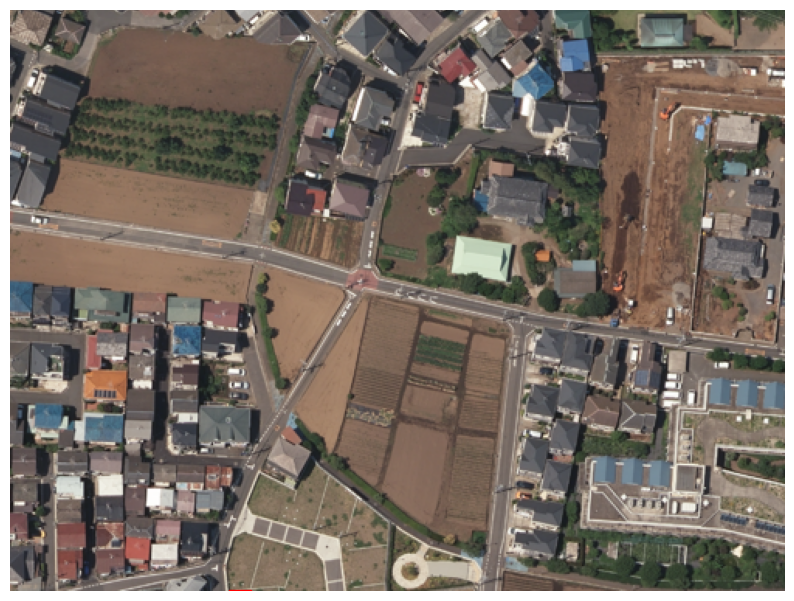

In [130]:
bboxes = get_bboxes(bbox_df, image_id=30, bbox_ids=10)
pprint(bboxes)
show_bboxes(
    imgfile=BBOX_IMAGE_DIR / 'train_30.tif',
    bboxes=bboxes
)

([0.0, 1.0, 469.0, 374.0],)


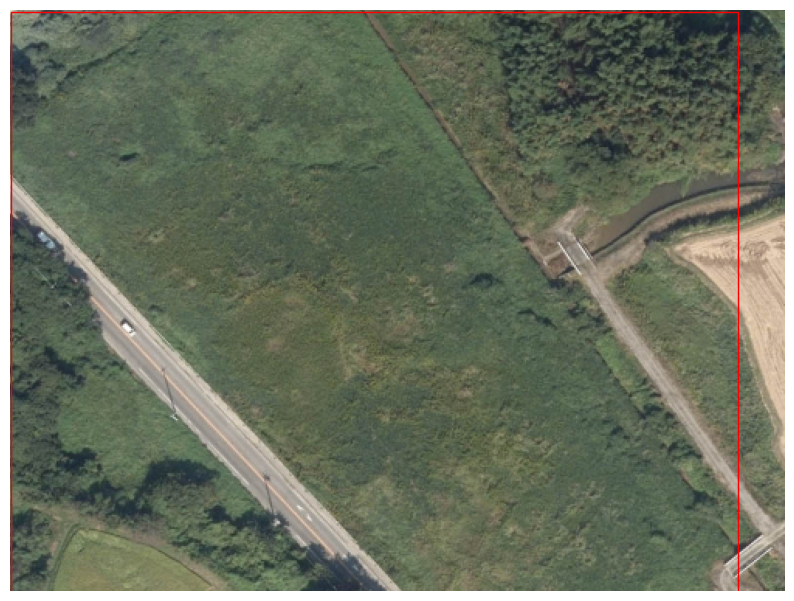

In [131]:
bboxes = get_bboxes(bbox_df, image_id=79, bbox_ids=0)
pprint(bboxes)
show_bboxes(
    imgfile=BBOX_IMAGE_DIR / 'train_79.tif',
    bboxes=bboxes
)

([0.0, 212.0, 5.0, 15.0],)


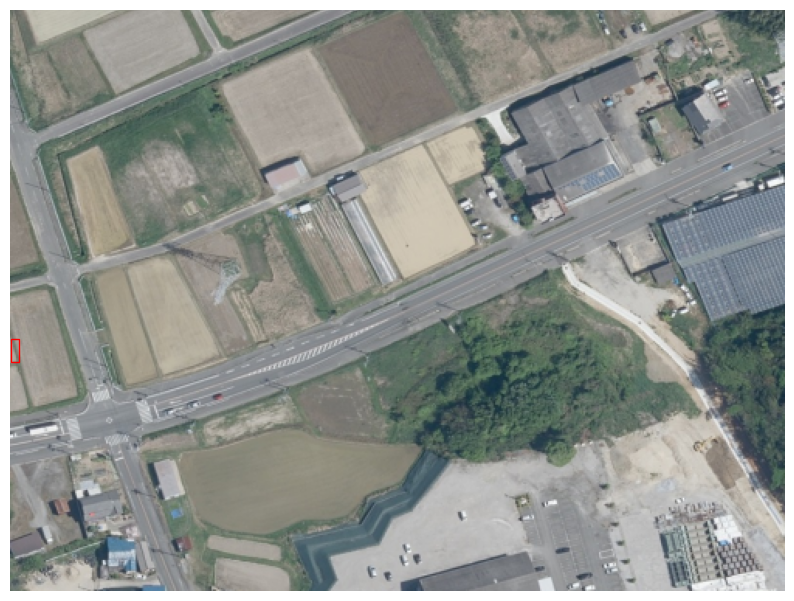

In [133]:
bboxes = get_bboxes(bbox_df, image_id=238, bbox_ids=6)
pprint(bboxes)
show_bboxes(
    imgfile=BBOX_IMAGE_DIR / 'train_238.tif',
    bboxes=bboxes
)

([0.0, 0.0, 91.0, 375.0],)


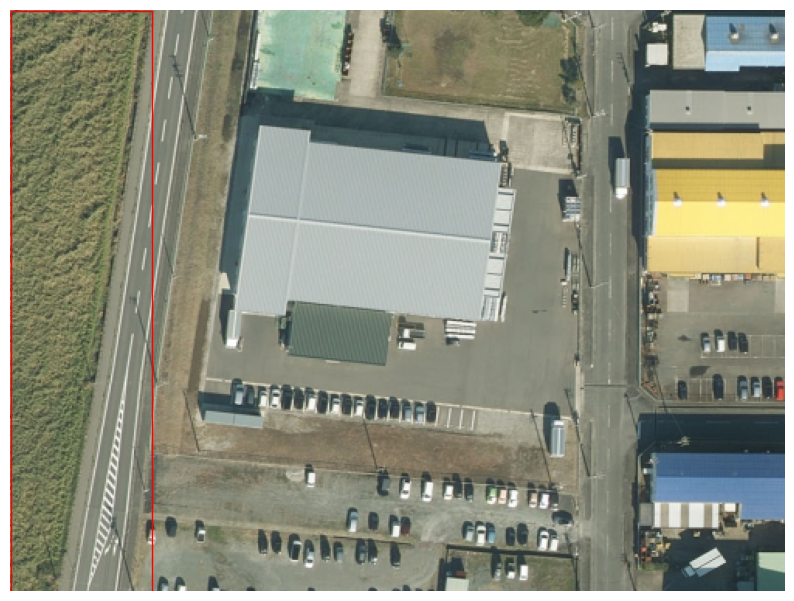

In [134]:
bboxes = get_bboxes(bbox_df, image_id=435, bbox_ids=1)
pprint(bboxes)
show_bboxes(
    imgfile=BBOX_IMAGE_DIR / 'train_435.tif',
    bboxes=bboxes
)

([89.742, 217.071, 45.586, 35.236999999999995],
 [121.0, 315.0, 39.0, 44.0],
 [121.0, 340.0, 17.0, 16.0],
 [156.0, 142.0, 72.0, 58.0],
 [138.0, 177.0, 41.0, 32.0],
 [100.0, 160.0, 39.0, 47.0],
 [28.0, 131.0, 38.0, 60.0],
 [25.0, 187.0, 30.0, 22.0],
 [21.0, 212.0, 32.0, 30.0],
 [19.0, 243.0, 33.0, 31.0],
 [14.0, 273.0, 36.0, 31.0],
 [11.0, 303.0, 35.0, 29.0],
 [35.0, 336.0, 27.0, 32.0],
 [9.0, 333.0, 43.0, 29.0],
 [54.0, 209.0, 17.0, 30.0],
 [53.0, 238.0, 16.0, 27.0],
 [50.0, 265.0, 17.0, 29.0],
 [47.0, 294.0, 18.0, 26.0],
 [46.0, 321.0, 16.0, 15.0],
 [223.0, 170.0, 54.0, 44.0],
 [219.0, 214.0, 39.0, 35.0],
 [195.0, 207.0, 33.0, 66.0],
 [224.0, 214.0, 35.0, 35.0],
 [215.0, 247.0, 37.0, 34.0],
 [189.0, 275.0, 46.0, 43.0],
 [271.0, 305.0, 48.0, 38.0],
 [80.0, 316.0, 39.0, 38.0],
 [257.0, 321.0, 71.0, 54.0],
 [277.0, 221.0, 51.0, 74.0],
 [261.0, 65.0, 53.0, 48.0])


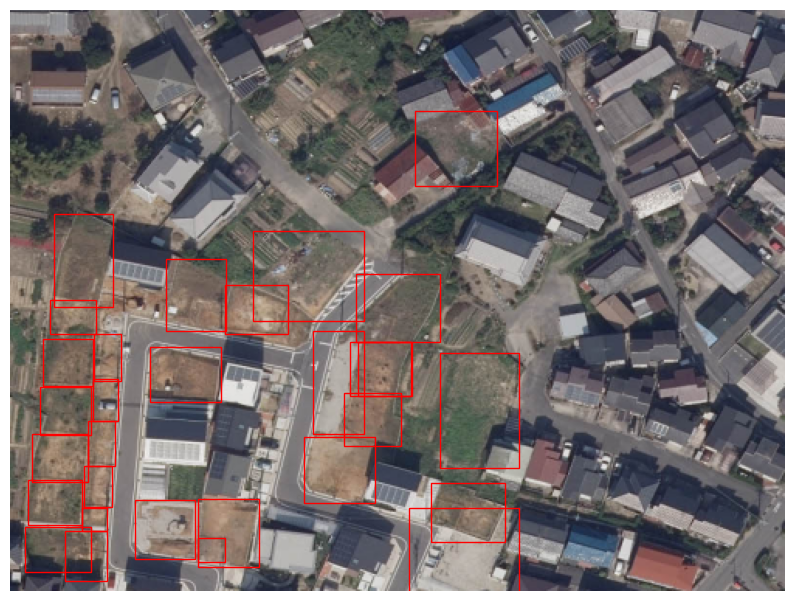

In [135]:
bboxes = get_bboxes(bbox_df, image_id=453, bbox_ids=None)
pprint(bboxes)
show_bboxes(
    imgfile=BBOX_IMAGE_DIR / 'train_453.tif',
    bboxes=bboxes
)